In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

1. Title: Image Segmentation data

2. Source Information
   -- Creators: Vision Group, University of Massachusetts
   -- Donor: Vision Group (Carla Brodley, brodley@cs.umass.edu)
   -- Date: November, 1990
 
3. Past Usage: None yet published

4. Relevant Information:

   The instances were drawn randomly from a database of 7 outdoor 
   images.  The images were handsegmented to create a classification
   for every pixel.  

   Each instance is a 3x3 region.

5. Number of Instances: Training data: 210  Test data: 2100

6. Number of Attributes: 19 continuous attributes

7. Attribute Information:

    1.  region-centroid-col:  the column of the center pixel of the region.
    2.  region-centroid-row:  the row of the center pixel of the region.
    3.  region-pixel-count:  the number of pixels in a region = 9.
    4.  short-line-density-5:  the results of a line extractoin algorithm that 
         counts how many lines of length 5 (any orientation) with
         low contrast, less than or equal to 5, go through the region.
    5.  short-line-density-2:  same as short-line-density-5 but counts lines
         of high contrast, greater than 5.
    6.  vedge-mean:  measure the contrast of horizontally
         adjacent pixels in the region.  There are 6, the mean and 
         standard deviation are given.  This attribute is used as
        a vertical edge detector.
    7.  vegde-sd:  (see 6)
    8.  hedge-mean:  measures the contrast of vertically adjacent
          pixels. Used for horizontal line detection. 
    9.  hedge-sd: (see 8).
    10. intensity-mean:  the average over the region of (R + G + B)/3
    11. rawred-mean: the average over the region of the R value.
    12. rawblue-mean: the average over the region of the B value.
    13. rawgreen-mean: the average over the region of the G value.
    14. exred-mean: measure the excess red:  (2R - (G + B))
    15. exblue-mean: measure the excess blue:  (2B - (G + R))
    16. exgreen-mean: measure the excess green:  (2G - (R + B))
    17. value-mean:  3-d nonlinear transformation
         of RGB. (Algorithm can be found in Foley and VanDam, Fundamentals
         of Interactive Computer Graphics)
    18. saturatoin-mean:  (see 17)
    19. hue-mean:  (see 17)

8. Missing Attribute Values: None

9. Class Distribution: 

   Classes:  brickface, sky, foliage, cement, window, path, grass.

   30 instances per class for training data.
   300 instances per class for test data.


In [23]:
!pip install gdown

In [24]:
!gdown 1V0uroiB_NckvKTRfKnHGRrFsRkJAMQ_e

Downloading...
From: https://drive.google.com/uc?id=1V0uroiB_NckvKTRfKnHGRrFsRkJAMQ_e
To: /kaggle/working/segmentation.test.csv
100%|█████████████████████████████████████████| 345k/345k [00:00<00:00, 109MB/s]


In [25]:
!gdown 1e8lHa6qHjAe6-_BsIc-ehOJE4bOhSA8a

Downloading...
From: https://drive.google.com/uc?id=1e8lHa6qHjAe6-_BsIc-ehOJE4bOhSA8a
To: /kaggle/working/segmentation.data.csv
100%|██████████████████████████████████████| 34.8k/34.8k [00:00<00:00, 62.2MB/s]


In [26]:
!ls

__notebook_source__.ipynb  segmentation.data.csv  segmentation.test.csv


In [27]:
test = pd.read_csv("segmentation.data.csv")

In [28]:
df = pd.read_csv("segmentation.test.csv")

In [29]:
df

,target,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,GRASS,110.0,189.0,9,0.000000,0.0,1.000000,0.666667,1.222222,1.186342,12.925926,10.888889,9.222222,18.666668,-6.111111,-11.111111,17.222221,18.666668,0.508139,1.910864
1,GRASS,86.0,187.0,9,0.000000,0.0,1.111111,0.720082,1.444444,0.750309,13.740741,11.666667,10.333334,19.222221,-6.222222,-10.222222,16.444445,19.222221,0.463329,1.941465
2,GRASS,225.0,244.0,9,0.000000,0.0,3.388889,2.195113,3.000000,1.520234,12.259259,10.333334,9.333334,17.111110,-5.777778,-8.777778,14.555555,17.111110,0.480149,1.987902
3,GRASS,47.0,232.0,9,0.000000,0.0,1.277778,1.254621,1.000000,0.894427,12.703704,11.000000,9.000000,18.111110,-5.111111,-11.111111,16.222221,18.111110,0.500966,1.875362
4,GRASS,97.0,186.0,9,0.000000,0.0,1.166667,0.691215,1.166667,1.005540,15.592592,13.888889,11.777778,21.111110,-5.111111,-11.444445,16.555555,21.111110,0.442661,1.863654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2095,CEMENT,32.0,158.0,9,0.000000,0.0,0.944445,0.862963,0.833333,0.611111,7.962963,6.333334,11.888889,5.666666,-4.888889,11.777778,-6.888889,11.888889,0.520578,-1.982834
2096,CEMENT,8.0,162.0,9,0.111111,0.0,1.611111,2.062962,0.333333,0.133333,8.370370,6.666666,12.000000,6.444445,-5.111111,10.888889,-5.777778,12.000000,0.484805,-2.044946
2097,CEMENT,128.0,161.0,9,0.000000,0.0,0.555555,0.251852,0.777778,0.162963,7.148148,5.555555,10.888889,5.000000,-4.777778,11.222222,-6.444445,10.888889,0.540918,-1.996307
2098,CEMENT,150.0,158.0,9,0.000000,0.0,2.166667,1.633334,1.388889,0.418518,8.444445,7.000000,12.222222,6.111111,-4.333334,11.333333,-7.000000,12.222222,0.503086,-1.943449


In [30]:
test

,target,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,GRASS,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,GRASS,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,GRASS,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,GRASS,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [31]:
print(len(df),len(test))

2100 210


In [32]:
np.unique(df['target'])

array(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
      dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['target_code'] = label_encoder.fit_transform(df['target'])
test['target_code'] = label_encoder.transform(test['target'])


In [34]:
df.dtypes

target                   object
REGION-CENTROID-COL     float64
REGION-CENTROID-ROW     float64
REGION-PIXEL-COUNT        int64
SHORT-LINE-DENSITY-5    float64
SHORT-LINE-DENSITY-2    float64
VEDGE-MEAN              float64
VEDGE-SD                float64
HEDGE-MEAN              float64
HEDGE-SD                float64
INTENSITY-MEAN          float64
RAWRED-MEAN             float64
RAWBLUE-MEAN            float64
RAWGREEN-MEAN           float64
EXRED-MEAN              float64
EXBLUE-MEAN             float64
EXGREEN-MEAN            float64
VALUE-MEAN              float64
SATURATION-MEAN         float64
HUE-MEAN                float64
target_code               int64
dtype: object

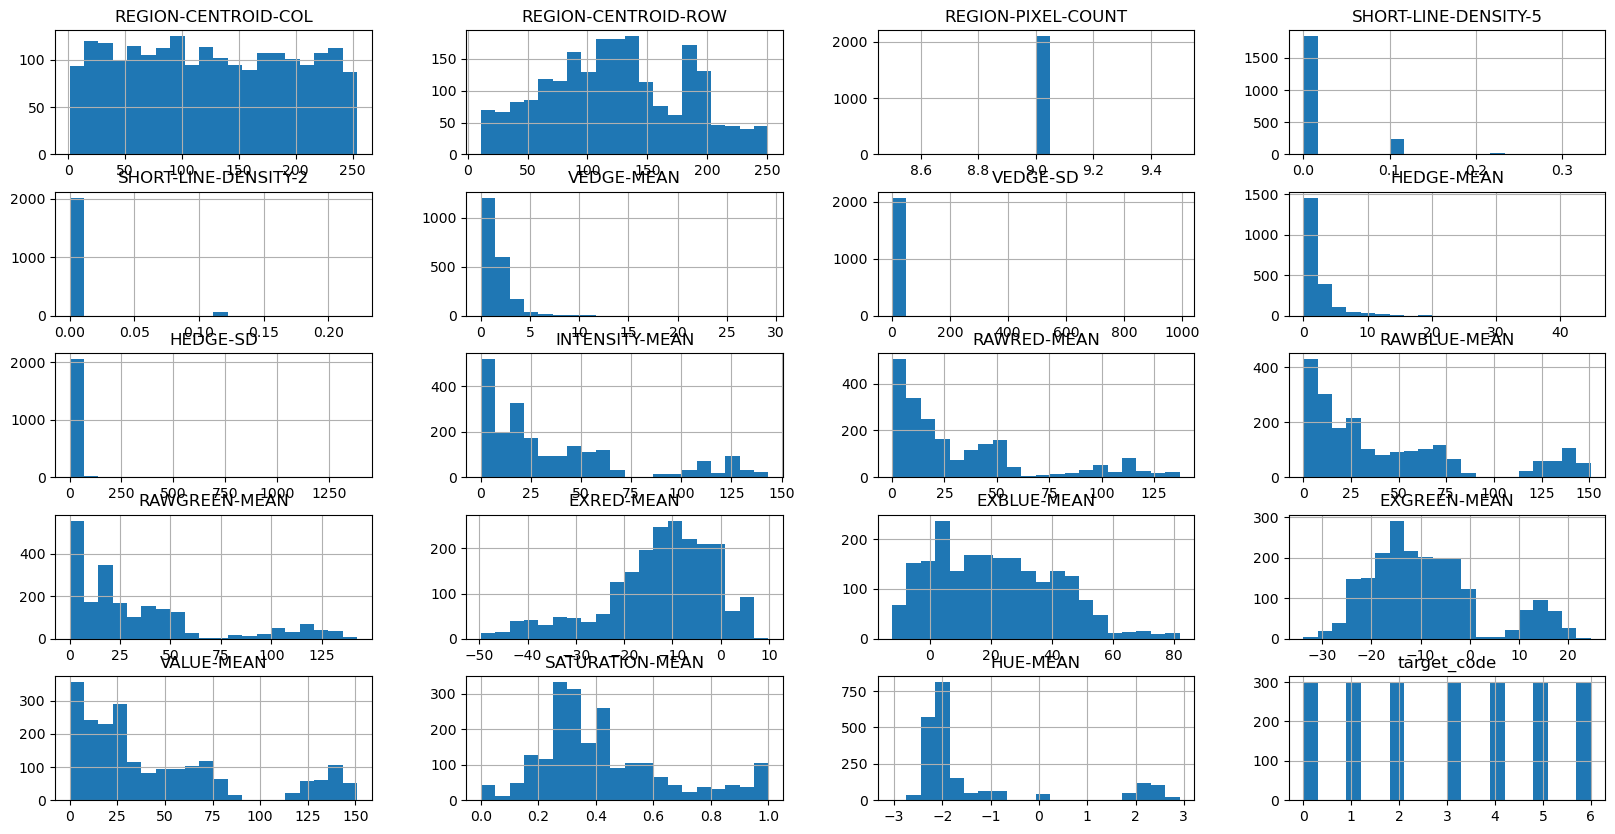

In [35]:
df.hist(figsize=(20,10), bins=20)
plt.show()

/tmp/ipykernel_28/1394531638.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1)


<Axes: >

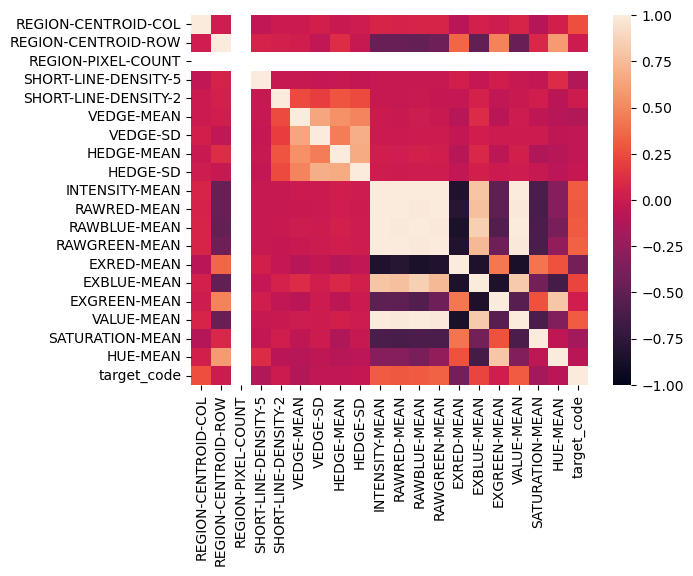

In [36]:
import seaborn as sns
sns.heatmap(df.corr(), vmin=-1, vmax=1)


/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:102: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/opt/conda/lib/python3.10/site-packages/pandas/plotting/_matplotlib/misc.py:92: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


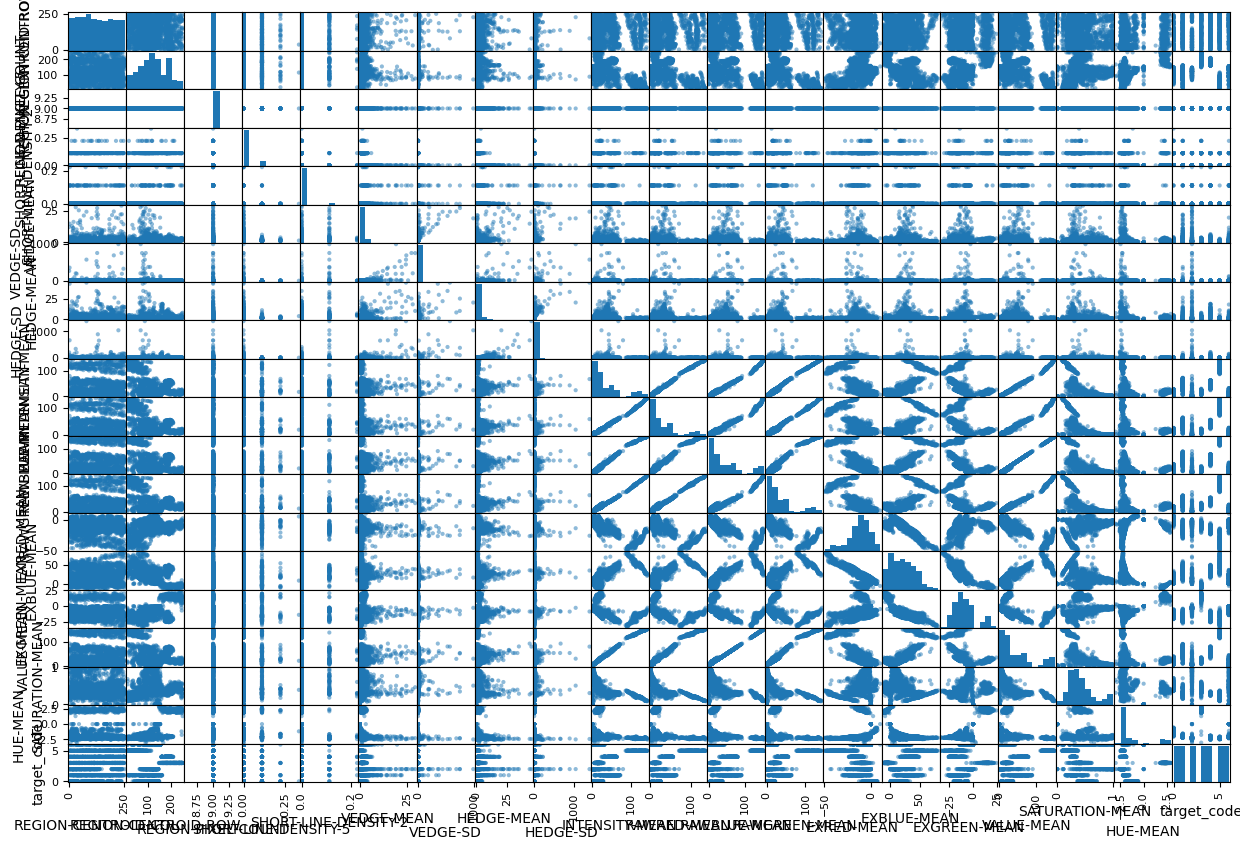

In [37]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(15, 10))
plt.show()

In [ ]:
df.columns

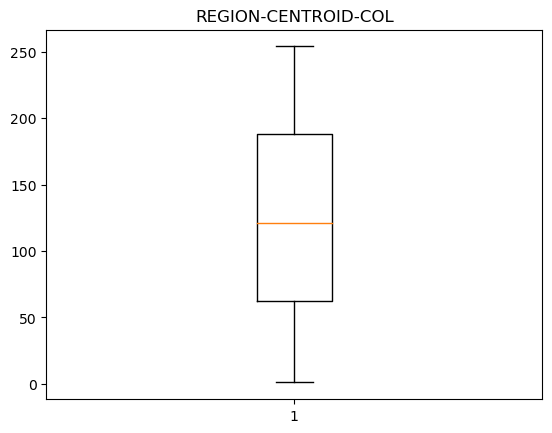

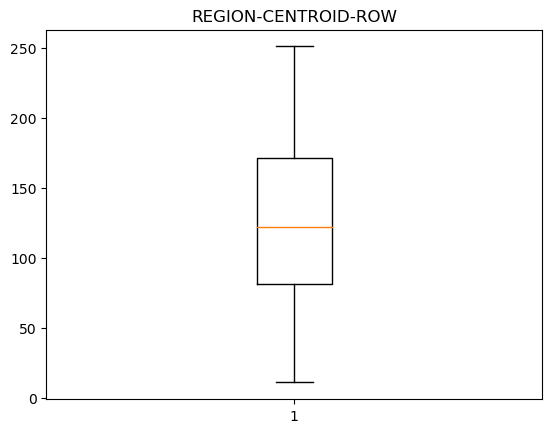

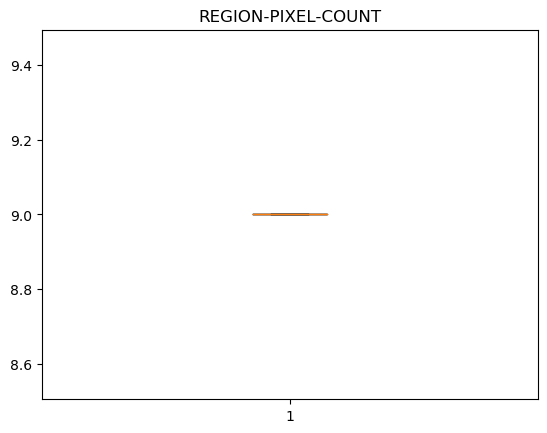

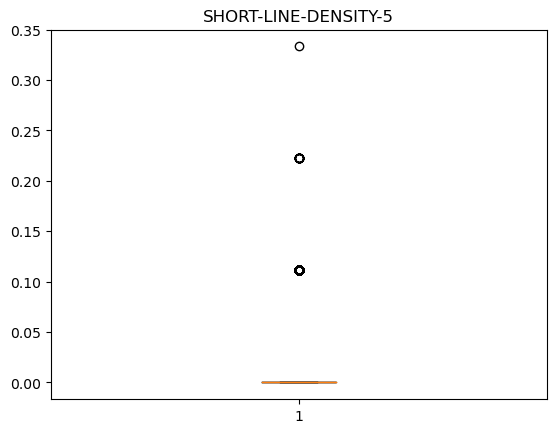

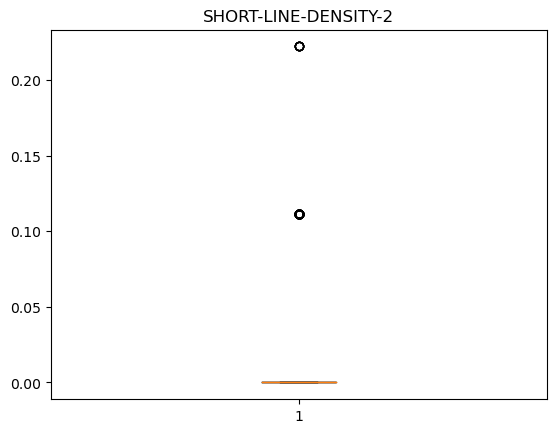

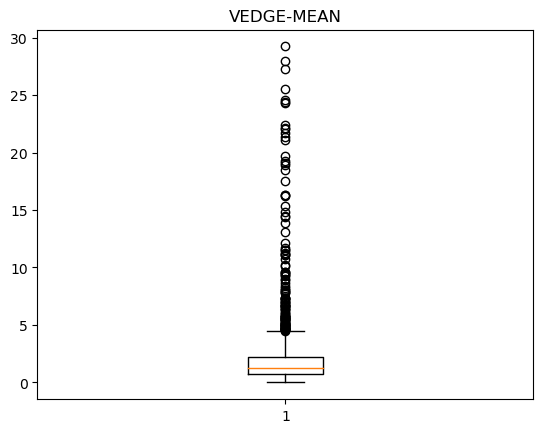

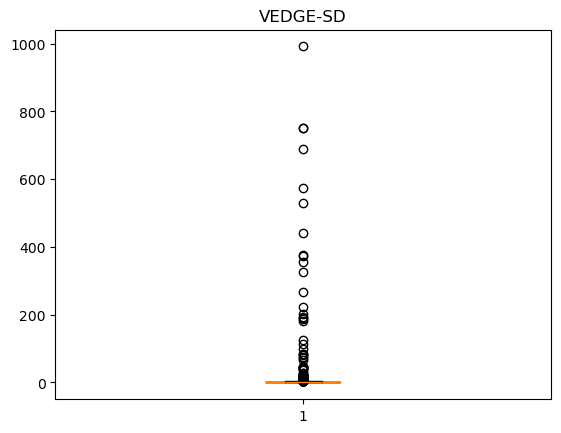

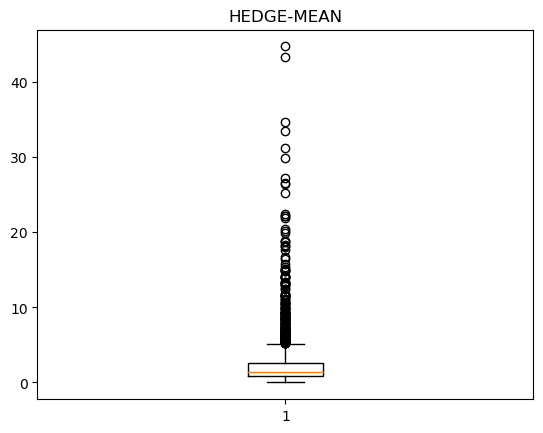

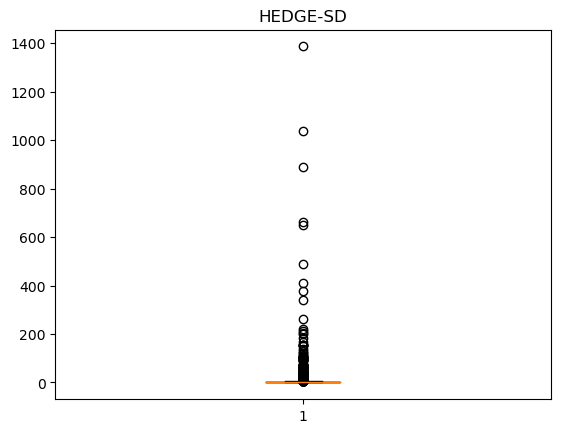

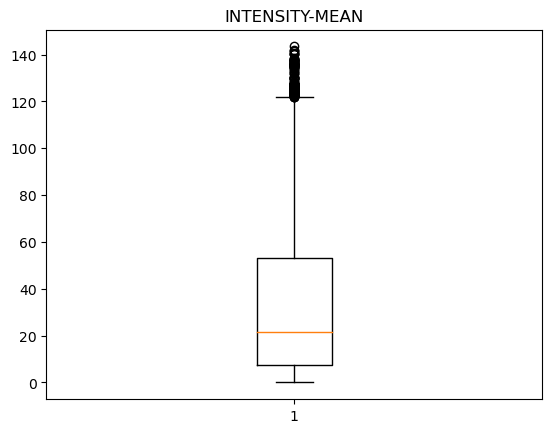

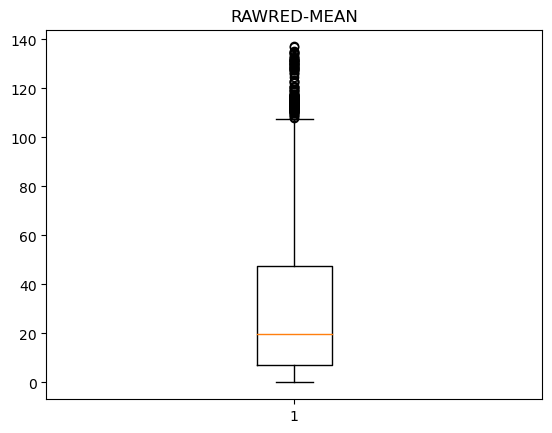

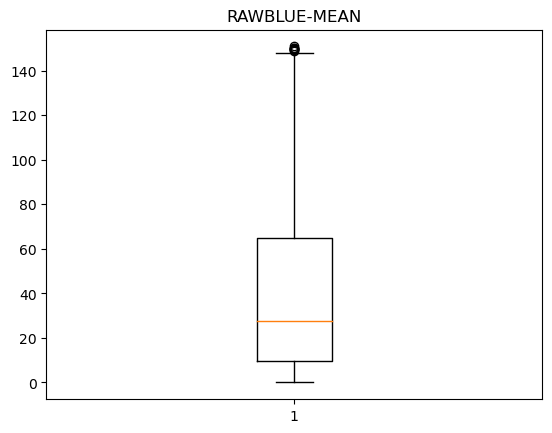

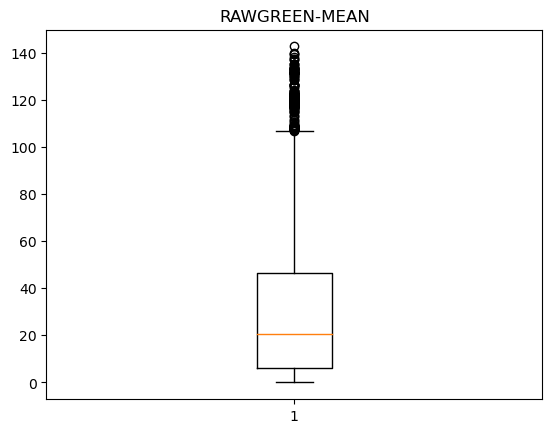

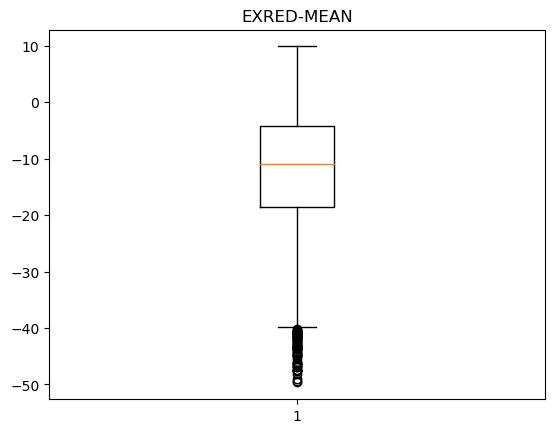

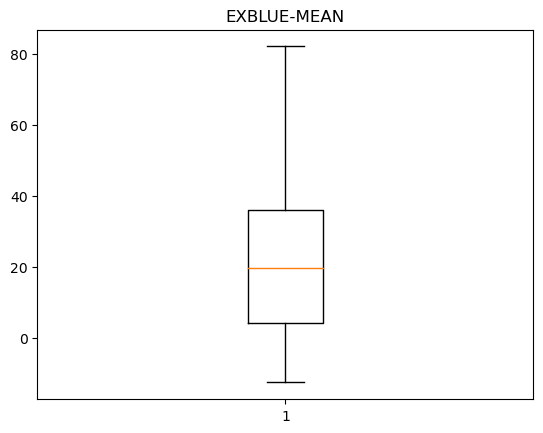

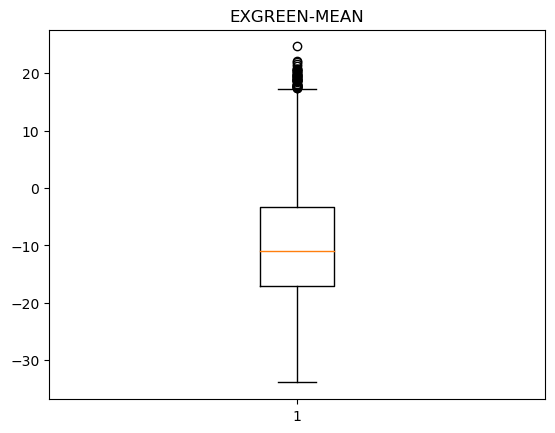

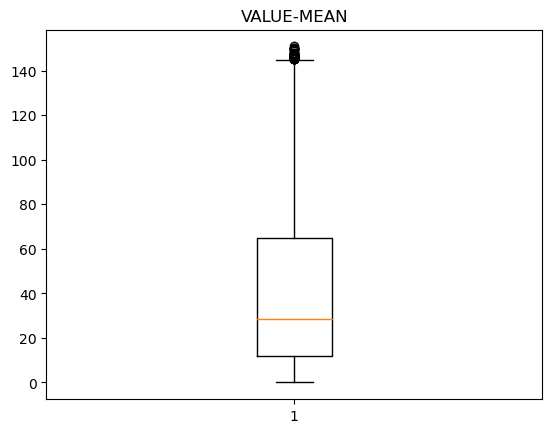

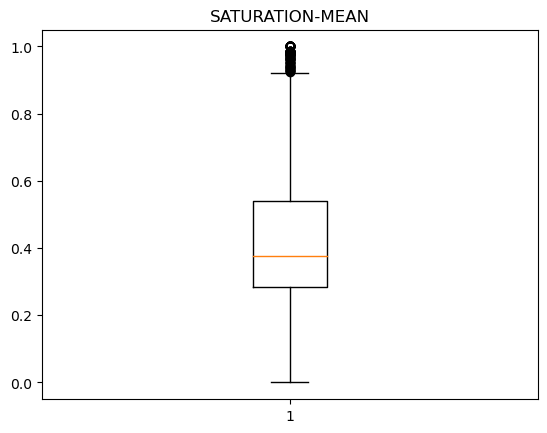

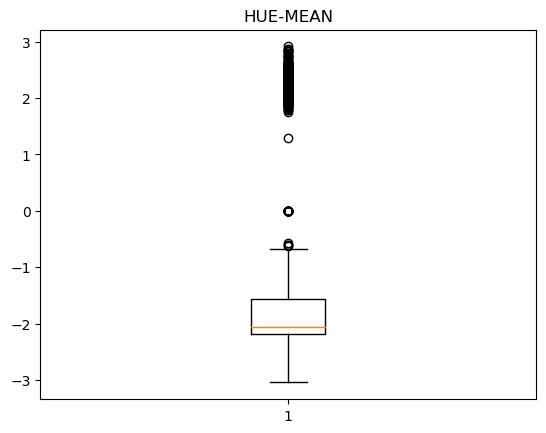

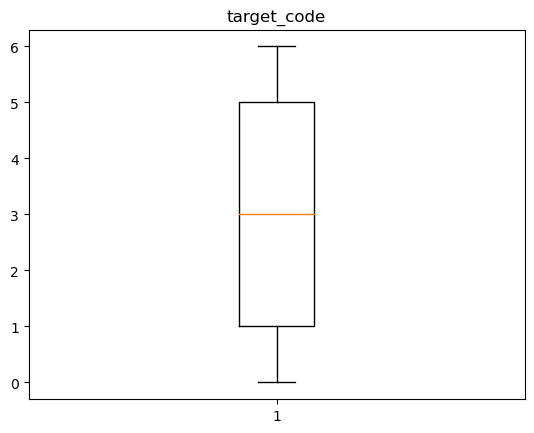

In [126]:
for i in df.columns:
    if i == 'target':
        continue
    fig, ax = plt.subplots(1)
    ax.boxplot(df[i])
    ax.set_title(i)
    plt.show()

In [39]:
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable
from sklearn.model_selection import train_test_split


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import torch
from torch import nn
from torch.nn import functional as F

from torch.utils.data import TensorDataset, DataLoader



In [98]:


class Net(nn.Module):
    def __init__(self, input_size=19, hidden_size1=20,hidden_size2=10, num_classes=7):
        super(Net, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size1)
        self.layer2 = nn.Linear(hidden_size1, hidden_size2)
        self.layer3 = nn.Linear(hidden_size2, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.layer1(x)
        out = self.sigmoid(out)
        out = self.layer2(out)
        out = self.sigmoid(out)
        out = self.layer3(out)
        return out

model = Net()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


In [99]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(),lr=0.01)

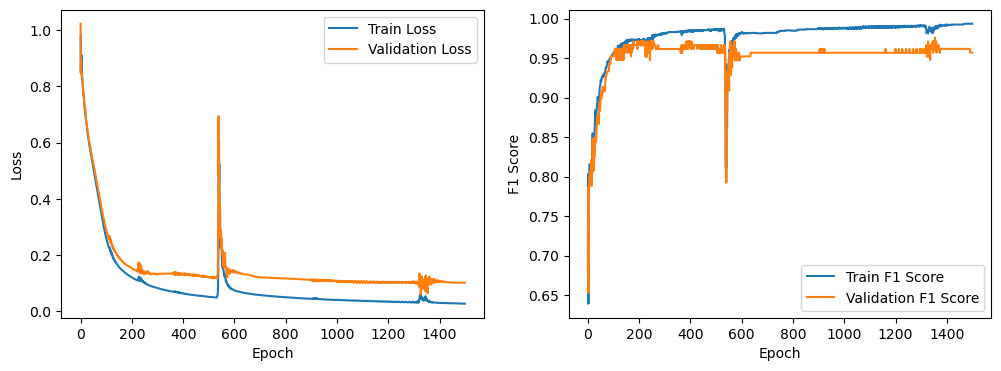

In [100]:

class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]


x_ = df.drop(['target','target_code'],axis=1)
y_ = df['target_code']
x,xv,y,yv = train_test_split(x_,y_,test_size=0.1,stratify=y_)
xt = test.drop(['target','target_code'],axis=1)
yt = test['target_code']
X_train = torch.tensor(x.values).float().to(device)
y_train = torch.tensor(y.values).long().to(device)

X_test = torch.tensor(xt.values).float().to(device)
y_test = torch.tensor(yt.values).long().to(device)

training_data = CustomDataset(X_train, y_train)
testing_data = CustomDataset(X_test, y_test)

train_loader = DataLoader(training_data, batch_size=1890, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=21)
X_valid = torch.tensor(xv.values).float().to(device)
y_valid = torch.tensor(yv.values).long().to(device)

validation_data = CustomDataset(X_valid, y_valid)
valid_loader = DataLoader(validation_data, batch_size=210,shuffle=True)



import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

epochs = 1500

loss_values_train = []
loss_values_valid = []
f1_values_train = []
f1_values_valid = []

for epoch in range(epochs):
    epoch_loss_train = 0.0
    for i, (features, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss_train += loss.item()

    loss_values_train.append(epoch_loss_train/len(train_loader))
    
    with torch.no_grad():
        all_predicted = torch.tensor([]).to(device)
        all_labels = torch.tensor([]).to(device)

        for features, labels in train_loader:
            outputs = net(features)
            _, predicted = torch.max(outputs.data, 1)
            all_predicted = torch.cat((all_predicted, predicted), 0)
            all_labels = torch.cat((all_labels, labels), 0)

        f1 = f1_score(all_labels.cpu().numpy(), all_predicted.cpu().numpy(), average='weighted')
        f1_values_train.append(f1)
    
    with torch.no_grad():
        epoch_loss_valid = 0.0
        all_predicted = torch.tensor([]).to(device)
        all_labels = torch.tensor([]).to(device)
        
        for features, labels in valid_loader:
            outputs = net(features)
            loss = criterion(outputs, labels)
            epoch_loss_valid += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            all_predicted = torch.cat((all_predicted, predicted), 0)
            all_labels = torch.cat((all_labels, labels), 0)

        loss_values_valid.append(epoch_loss_valid/len(valid_loader))
        f1 = f1_score(all_labels.cpu().numpy(), all_predicted.cpu().numpy(), average='weighted')
        f1_values_valid.append(f1)

#     print(f'Epoch {epoch+1}/{epochs}: Train Loss: {loss_values_train[-1]}, Validation Loss: {loss_values_valid[-1]}, Train F1 Score: {f1_values_train[-1]}, Validation F1 Score: {f1_values_valid[-1]}')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(loss_values_train, label='Train Loss')
plt.plot(loss_values_valid, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(f1_values_train, label='Train F1 Score')
plt.plot(f1_values_valid, label='Validation F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.legend()

plt.show()


In [101]:
net.eval()  
with torch.no_grad():
    all_predicted = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    
    for features, labels in test_loader:
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        all_predicted = torch.cat((all_predicted, predicted), 0)
        all_labels = torch.cat((all_labels, labels), 0)
    
    f1 = f1_score(all_labels.cpu().numpy(), all_predicted.cpu().numpy(), average='weighted')
    print('F1 score on the test data: {}'.format(f1))

F1 score on the test data: 0.9855309877019358


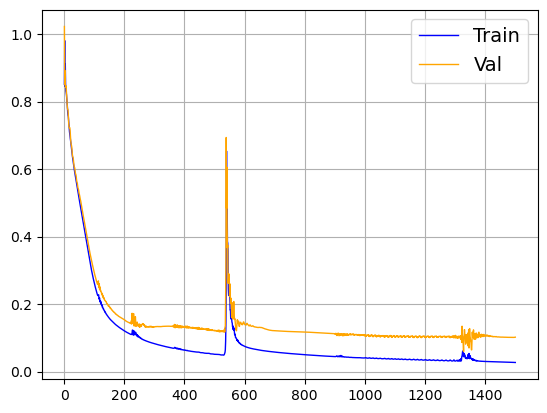

In [107]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(1, epochs, epochs), loss_values_train, label='Train', linewidth=1, color="blue")
ax.plot(np.linspace(1, epochs, epochs), loss_values_valid, label='Val', linewidth=1, color="orange")
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax.legend(fontsize=14)
ax.grid()
plt.show()

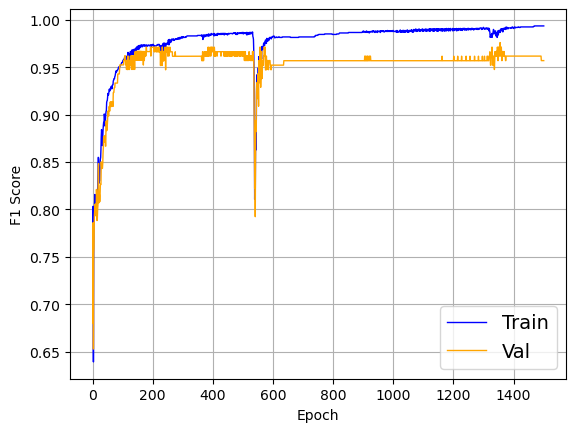

In [108]:
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(1, epochs, epochs), f1_values_train, label='Train', linewidth=1, color="blue")
ax.plot(np.linspace(1, epochs, epochs), f1_values_valid, label='Val', linewidth=1, color="orange")
ax.legend(fontsize=14)
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
ax.grid()
plt.show()

In [112]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

F1 score on the test data: 0.9855309877019358


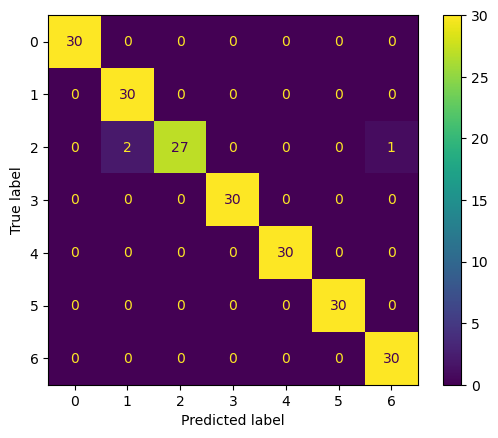

In [115]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

net.eval()  
with torch.no_grad():
    all_predicted = torch.tensor([]).to(device)
    all_labels = torch.tensor([]).to(device)
    
    for features, labels in test_loader:
        outputs = net(features)
        _, predicted = torch.max(outputs.data, 1)
        all_predicted = torch.cat((all_predicted, predicted), 0)
        all_labels = torch.cat((all_labels, labels), 0)
    
    f1 = f1_score(all_labels.cpu().numpy(), all_predicted.cpu().numpy(), average='weighted')
    print('F1 score on the test data: {}'.format(f1))

    cm = confusion_matrix(all_labels.cpu().numpy(), all_predicted.cpu().numpy())
    cmd = ConfusionMatrixDisplay(cm, display_labels=range(7))
    cmd.plot()

plt.show()


In [119]:
label_encoder.inverse_transform([0,1,2,3,4,5,6])

array(['BRICKFACE', 'CEMENT', 'FOLIAGE', 'GRASS', 'PATH', 'SKY', 'WINDOW'],
      dtype=object)